In [11]:
import os
import re
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

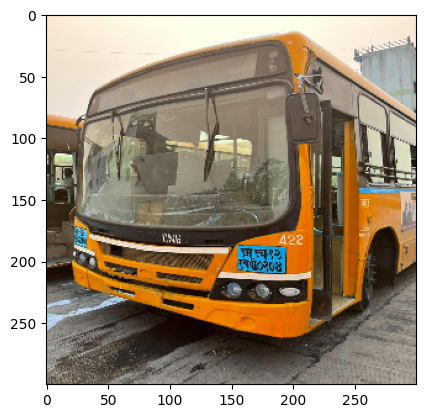

In [23]:
img = cv2.imread('C:/abc.jpeg')
img = cv2.resize(img,(300,300))
plt.imshow(img)
plt.show()

In [18]:
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(img,paragraph="False")
result

Using CPU. Note: This module is much faster with a GPU.


[[[[126, 147], [177, 147], [177, 178], [126, 178]], '422 554']]

422 554


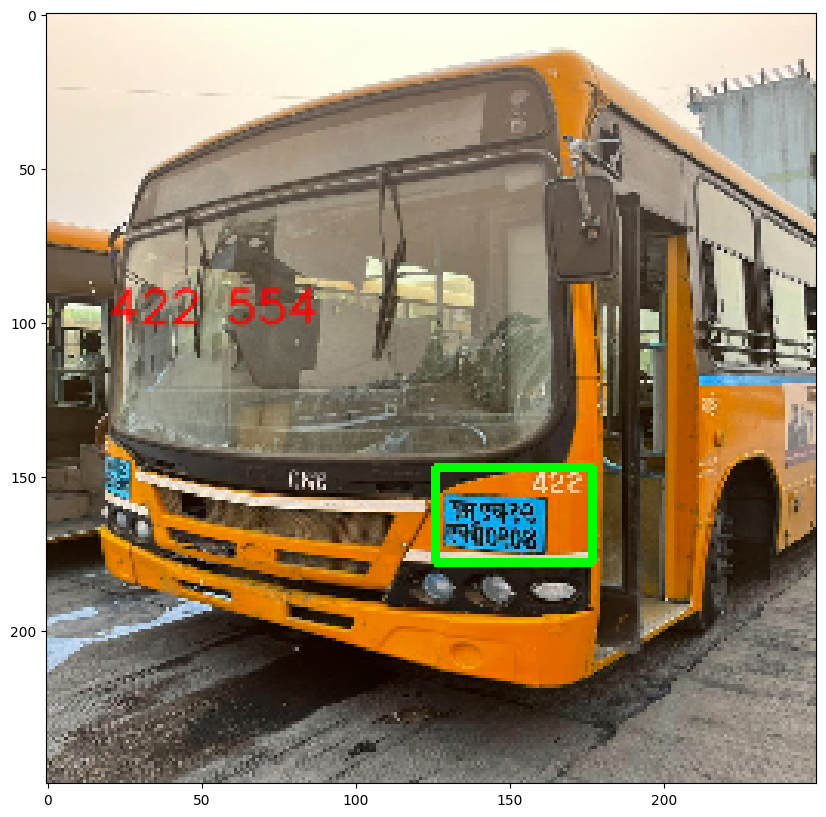

In [19]:
font = cv2.FONT_HERSHEY_SIMPLEX
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    print(text)
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),2)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(255,0,0),1,cv2.LINE_AA)
    spacer+=15
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [20]:
result_array = np.array(result)

# Extract the last column of the array
last_column = result_array[:, -1]

# Print the last column
print(last_column)

['422 554']


C:\Users\Shreya Roy\AppData\Local\Temp\ipykernel_13032\1223956250.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result_array = np.array(result)


In [21]:
desired_string = ''
for text in last_column:
    if 'marcopolo' in text.lower():
        # Extract the string before and after 'marcopolo'
        parts = text.lower().split('marcopolo')
        if len(parts) == 2:
            # Combine the two parts of the string without 'marcopolo'
            desired_string = parts[0] + parts[1]

# Print the desired string
print(desired_string)

In [22]:
for string in last_column:
    # Use regex to search for pattern of 3 numbers in the string
    match = re.search(r'\d{3}', string)
    if match:
        # If match is found, display the numbers
        numbers = match.group()
        print(numbers)

422
